In [1]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_cereal = pd.read_csv("cereal.csv")
print(df_cereal.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


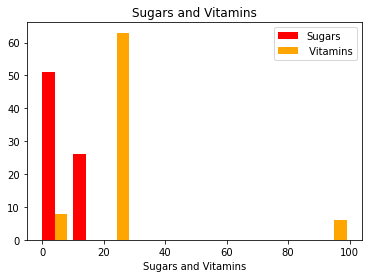

In [11]:
plt.hist([df_cereal["sugars"], df_cereal["vitamins"]],
         color=['red', 'orange'])
plt.title("Sugars and Vitamins")
plt.xlabel("Sugars and Vitamins")
plt.legend(["Sugars", " Vitamins"])

In [4]:
dict_mfr = {'N': 'Nabisco',
            'Q': 'Quaker Oats',
            'K': 'Kelloggs',
            'R': 'Raslston Purina',
            'G': 'General Mills',
            'P': 'Post',
            'A': 'American Home Foods Products'}


In [5]:
df_cereal["manufactures"] = [dict_mfr[mfr] for mfr in df_cereal["mfr"]]

grouped_mfr = df_cereal.groupby(["manufactures"], as_index=False).count()
x = grouped_mfr["manufactures"]
y = grouped_mfr["mfr"]


Text(0.5, 1.0, 'number of cereals manufactured by Manufactures')

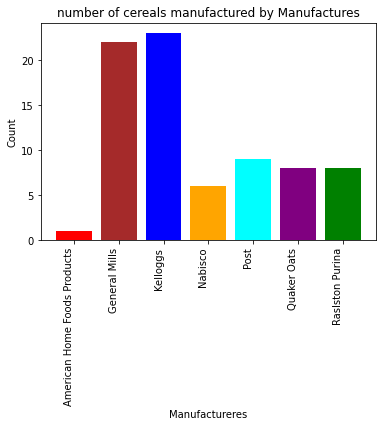

In [6]:


plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right',)
plt.bar(x, y,color=(['red','brown','blue','orange','cyan','purple','green']))
plt.xlabel("Manufactureres")
plt.ylabel("Count")
plt.title("number of cereals manufactured by Manufactures")

In [8]:
X = df_cereal.iloc[:, 3:15]
Y = df_cereal["rating"]

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=10)


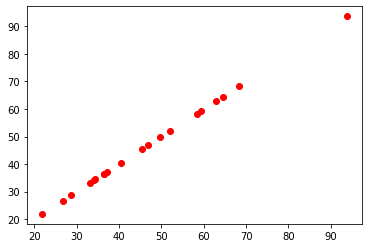

In [17]:
liner_model = LinearRegression()
liner_model.fit(x_train, y_train)

predicted_ratings = liner_model.predict(x_test)

plt.scatter(np.array(predicted_ratings), np.array(y_test),color='red')